#### Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Columns in DataFrame :
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

### Data Cleaning

In [3]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We drop our column which is not in use for our work

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No null values in Dataset

In [6]:
df.duplicated().sum()

146

We have 146 duplicate records we have to drop that duplicate values

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

After dropping duplicate values we can check again for it. Now we do not have duplicate values in our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Total no. of records are 53940, 9 features and price is our target column

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


#### Data Visualization

#### Top 10 price of diamonds from the dataset

In [11]:
df.sort_values(by=['price'],ascending=False).head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21


#### Visualization according categorical features

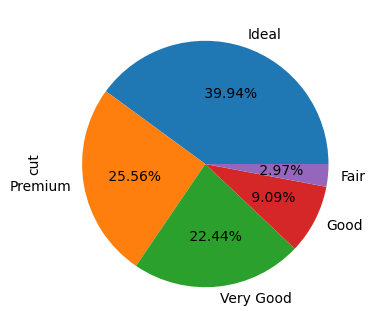

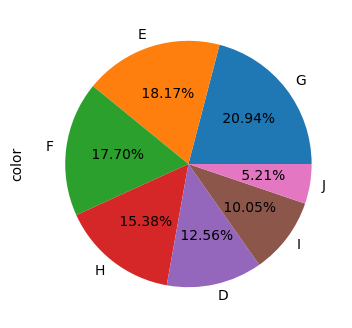

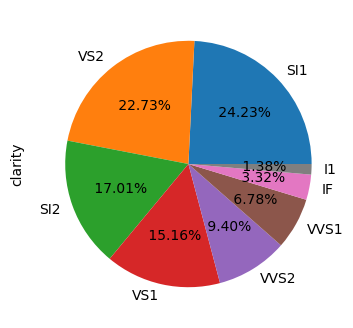

In [12]:
cat_col = df.select_dtypes('object').columns
for i in cat_col:
    plt.figure(figsize=(4,4))
    df[i].value_counts().plot.pie(autopct='% 1.2f%%')
    plt.show()

#### Split into x & y

In [13]:
x=df.drop(['price'],axis=1)
y=df['price']

We splits our dataset into features(x) & target(y)

In [14]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [15]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

#### Feature Scaling

In [16]:
num_col = x.select_dtypes(['int64','float64']).columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[num_col] = sc.fit_transform(x[num_col])
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.199402,Ideal,E,SI2,-0.173495,-1.100486,-1.589399,-1.537553,-1.572574
1,-1.241651,Premium,E,SI1,-1.362393,1.585691,-1.642938,-1.660231,-1.742780
2,-1.199402,Good,E,VS1,-3.390512,3.376475,-1.500168,-1.458689,-1.742780
3,-1.072656,Premium,I,VS2,0.455922,0.242603,-1.366321,-1.318485,-1.288899
4,-1.030407,Good,J,SI2,1.085338,0.242603,-1.241397,-1.213332,-1.118694


We performed feature scaling on numerical features for standardization our data.

#### Encoding Categorical features

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[cat_col]=oe.fit_transform(x[cat_col])

We also performed Encoding our categorical features to fed data to our model.

In [18]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.199402,2.0,1.0,3.0,-0.173495,-1.100486,-1.589399,-1.537553,-1.572574
1,-1.241651,3.0,1.0,2.0,-1.362393,1.585691,-1.642938,-1.660231,-1.742780
2,-1.199402,1.0,1.0,4.0,-3.390512,3.376475,-1.500168,-1.458689,-1.742780
3,-1.072656,3.0,5.0,5.0,0.455922,0.242603,-1.366321,-1.318485,-1.288899
4,-1.030407,1.0,6.0,3.0,1.085338,0.242603,-1.241397,-1.213332,-1.118694


#### Splits into training and testing data

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

After Splitting x & y into training & testing data to build the model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

We will try different types of algorithm to build the model and check accuracy. Select one model which gives highest accuracy and try for hypertunning to increase the model accuracy.

In [21]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

In [22]:
def mymodel(model):
    model.fit(xtrain,ytrain) # build model
    ypred = model.predict(xtest) #predicted value of y
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'training accuracy : {train}')
    print(f'testing accuracy : {test}')
    print(f'Model Name : {model}')
    print(f'Accuracy of model : {round(r2_score(ytest,ypred)*100,2)} %')

In [23]:
mymodel(lr)

training accuracy : 0.8855345674157292
testing accuracy : 0.8830196054670751
Model Name : LinearRegression()
Accuracy of model : 88.3 %


In [24]:
mymodel(knn)

training accuracy : 0.9773739292617025
testing accuracy : 0.9660433358208882
Model Name : KNeighborsRegressor()
Accuracy of model : 96.6 %


In [25]:
mymodel(dt)

training accuracy : 0.9999952511667353
testing accuracy : 0.9662980433792141
Model Name : DecisionTreeRegressor()
Accuracy of model : 96.63 %


My KNN model gives me accuracy almost equal to Decision Tree model. but we consider Decision Tree model because KNN take time to work on large dataset, so we build our model on Decision Tree. so we perform hypertunning on Decision Tree to increase our accuracy as well as to reduce overfitting. we will use Random Forest as hypertune parameter for Decision Tree

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain) # build model
ypred = rf.predict(xtest) #predicted value of y
train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)
print(f'training accuracy : {train}')
print(f'testing accuracy : {test}')
print(f'Accuracy of model : {round(r2_score(ytest,ypred)*100,2)} %')

training accuracy : 0.9973022459704362
testing accuracy : 0.982125067802318
Accuracy of model : 98.21 %


#### Perform pickling on scaling feature object, encoding object and prediction model

In [27]:
#import pickle
#pickle.dump(sc , open("stdscl.pkl" , "wb"))

In [28]:
#import pickle
#pickle.dump(oe , open("ordencode.pkl" , "wb"))

In [29]:
#import pickle
#pickle.dump(rf , open("predict.pkl" , "wb"))

#### Reporting
The aim of this study was to create regression model for the diamond dataset and to predict the price of Diamond by creating model and to obtain maximum accuracy score in the established models. The work done is as follows:

Diamond Data Set read.

With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. Descriptive statistics of the data set were examined. It was concluded that there were no missing observations and outliers in the data set. Duplicate values removed from the datasets.

During Model Building; Logistic Regression, KNN, DT like using machine learning models Accuracy Score were calculated. Later Random Forest hyperparameter optimizations optimized to increase Accuracy score.

Result; The model created as a result of Random Forest became the model with the maximum Accuracy Score. (0.9821)

